# networkx基础

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

## 1.创建无向图

In [ ]:
# 创建无向图
G = nx.Graph()


G.add_node(1) # 添加节点１
G.add_edge(2,3) #　添加由节点２，３组成的边
print("节点：",G.nodes)
print("边：",G.edges)
print("节点数：",G.number_of_nodes())
print("边数：",G.number_of_edges())

# 分别输出图的节点，边，节点数，边数。

nx.draw(G,with_labels=True)
# 在draw时可指定是否显示labels和字体
plt.show()

## 2.创建环

In [ ]:
G = nx.DiGraph()


G.add_nodes_from(['a', 'b', 'c','d']) # 从列表中创建若干节点
nx.add_cycle(G,['a', 'b', 'c', 'd']) # 按顺序创建一个环 a->b->c->d->a
nx.draw(G,with_labels=True, font_weight='bold')
# 在draw时可指定是否显示labels和字体
plt.show()

## 3.创建有向图

In [ ]:
# 创建有向图
G = nx.DiGraph()


G.add_node(1)
G.add_node(2)
G.add_nodes_from([3, 4, 5, 6])
nx.add_cycle(G,[1, 2, 3, 4])
G.add_edge(1, 3)
G.add_edges_from([(3, 5), (3, 6), (6, 7)])
print("输出全部节点：{}".format(G.nodes()))
print("输出全部边：{}".format(G.edges()))
print("输出全部边的数量：{}".format(G.number_of_edges()))
nx.draw(G,with_labels=True, font_weight='bold')
plt.show()

## 4.创建加权图
- 使用G.add_weighted_edges_from([(0,1,3.0), (1,2,7.5)]) # 给０１边加权３,１２边加权7.5
- 使用G.add_edge('a','b',weight=0.6)                    # 给ab边加权

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from([(0,1,3.0), (1,2,7.5)]) # 给０１边加权３，　１２边加权７．５
print(G.get_edge_data(1,2))  # 获得１２边的属性(权重)

G.add_weighted_edges_from([(2,3,5)])
# G.add_weighted_edges_from([(2,3,5)], weight='color') #传入weight参数改变权重名字，默认为weight

print(G.edges.data())

nx.draw(G,with_labels=True)

plt.show()

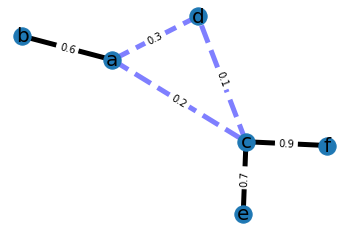

In [43]:
# Demo,更具不同边的权值来画图

G=nx.Graph()
#加入带权边
G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.7)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

#按权重划分为重权值得边和轻权值的边
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

#节点位置
pos=nx.spring_layout(G) # 返回所有的节点位置列表


# 获取边的weight属性
edge_labels = nx.get_edge_attributes(G, 'weight')


#首先画出节点位置
nx.draw_networkx_nodes(G,pos,node_size=300)


# 依据权重，实线为权值大的边。虚线为权值小的边
# 根据边列表分别画出图形
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=5)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=5,alpha=0.5,edge_color='b',style='dashed')

# 节点labels标签定义
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# 边labels标签定义
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off') # 是否显示边框
# plt.savefig("weighted_graph.png") # save as png

plt.show() # display